<center><h1>India's Silent Epidemic(SDG Goal 3: Good Health and Well Being)</h1></center>

**“When you feel like giving up, just remember the reason why you held on for so long.”**<br><br>

Suicide is the act of intentionally causing one’s own death.Mental disorders (including depression, bipolar disorder, autism spectrum disorders, schizophrenia, personality disorders, anxiety disorders), nihilistic beliefs, physical disorders (such as chronic fatigue syndrome), and substance use disorders (including alcohol use disorder and the use of and withdrawal from benzodiazepines) are risk factors. Some suicides are impulsive acts due to stress (such as financial or academic difficulties), relationship problems (such as breakups or deaths of close ones), or harassment/bullying. Those who have previously attempted suicide are at a higher risk for future attempts. Effective suicide prevention efforts include limiting access to methods of suicide — such as firearms, drugs, and poisons; treating mental disorders and substance misuse; careful media reporting about suicide; and improving economic conditions. Even though crisis hotlines are common, they have not been well studied.<br><br>

**Key facts:**<br>
More than 700 000 people die due to suicide every year.<br>
For every suicide, there are many more people who attempt suicide. A prior suicide attempt is the single most important risk factor for suicide in the general population.<br>
Suicide is the fourth leading cause of death in 15–19-year-olds.<br>
77% of global suicides occur in low- and middle-income countries.<br>
Ingestion of pesticides, hanging, and firearms are among the most common methods of suicide globally.<br>
Every year 703 000 people take their own life and there are many more people who attempt suicide. Every suicide is a tragedy that affects families, communities, and entire countries and has long-lasting effects on the people left behind. Suicide occurs throughout the lifespan and was the fourth leading cause of death among 15–29 year-olds globally in 2019.<br><br>

Suicide does not just occur in high-income countries but is a global phenomenon in all regions of the world. In fact, over 77% of global suicides occurred in low- and middle-income countries in 2019.<br><br>

Suicide is a serious public health problem; however, suicides are preventable with timely, evidence-based, and often low-cost interventions. For national responses to be effective, a comprehensive multisectoral suicide prevention strategy is needed.

**Who is at risk?**<br>
While the link between suicide and mental disorders (in particular, depression and alcohol use disorders) is well established in high-income countries, many suicides happen impulsively in moments of crisis with a breakdown in the ability to deal with life stresses, such as financial problems, relationship break-up or chronic pain and illness.<br><br>


![download](download.jpg)

# 1. Importing Necessary Libraries

In [1]:
#pandas and numpy for data manipulation
#matplotlib for visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

# 2. Importing Data

Let's begin the analysis by importing the data and understanding its characteristics.

In [2]:
df = pd.read_csv('Suicides in India 2001-2012.csv')
df.head(10)

State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   
5  A & N Islands  2001    Causes                          Family Problems   
6  A & N Islands  2001    Causes      Ideological Causes/Hero Worshipping   
7  A & N Islands  2001    Causes                  Other Prolonged Illness   
8  A & N Islands  2001    Causes                         Property Dispute   
9  A & N Islands  2001    Causes                Fall in Social Reputation   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  
5  Female      0-14      0  
6  Female      0-14      0  
7  Female      0-14      0  
8  Female      0-14      0  
9  Female      0-14      0

In [3]:
df.shape
print('Number of Rows: ' + str(df.shape[0]) + '\nNumber of Columns: ' + str(df.shape[1]))

Number of Rows: 237519
Number of Columns: 7


In [4]:
# checking for data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [5]:
# describing data for better statistical analysis and for better understanding of data
df.describe()

Year          Total
count  237519.000000  237519.000000
mean     2006.500448      55.034477
std         3.452240     792.749038
min      2001.000000       0.000000
25%      2004.000000       0.000000
50%      2007.000000       0.000000
75%      2010.000000       6.000000
max      2012.000000   63343.000000

# 3. Data Cleaning

Usually, data comes with many impurities such as missing values, duplicated columns or rows, and datatype errors etc. Therefore, it's important to clean the data properly before proceeding with further analysis to ensure higher accuracy.<br>
Let's proceed with Data Cleaning.

In [6]:
#checking for null values
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

Nice! There are no NaN values.

In [7]:
# checking for duplicates
df.duplicated().sum()

0

No Duplicates as well!

In [8]:
# checking for column names
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

In [9]:
# checking for unique values in column 'States'
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Total (All India)', 'Total (States)', 'Total (Uts)', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [10]:
# checking how many times a state name is repeated
df.State.value_counts()

State
Madhya Pradesh       6792
Maharashtra          6792
Karnataka            6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Bihar                6790
Chhattisgarh         6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Tamil Nadu           6786
Gujarat              6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (All India)     312
Total (States)        312
Total (Uts)           312
Name: 

There are some Rows named 'Total (All India)', 'Total (States)', 'Total (Uts)' which are not necessary, so let's just remove them.

In [11]:
# Removing unnecessary rows from data 
df = df.query('State != ("Total (All India)","Total (States)", "Total (Uts)")')
df.shape

(236583, 7)

Now dataframe doesn't contain any rows with state name as 'Total (All India)', 'Total (States)', 'Total (Uts)'.

In [12]:
df.State.unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'D & N Haveli',
       'Daman & Diu', 'Delhi (Ut)', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [13]:
# Removing rows with zero total suicides because they do not add any value to the analysis and are therefore useless
df = df.query('Total != 0')
df.shape

(101110, 7)

In [14]:
df.Total.value_counts()

Total
1       16038
2        9939
3        6697
4        5110
5        4173
        ...  
1774        1
1332        1
732         1
1548        1
2658        1
Name: count, Length: 1763, dtype: int64

# 4. Data Analysis

Now the data is almost cleaned and ready for further analysis.

In [15]:
# checking how many times each unique value occurs in the Type_code column
df.Type_code.value_counts()

Type_code
Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: count, dtype: int64

## 4.1 Variation of No. of suicides over the years

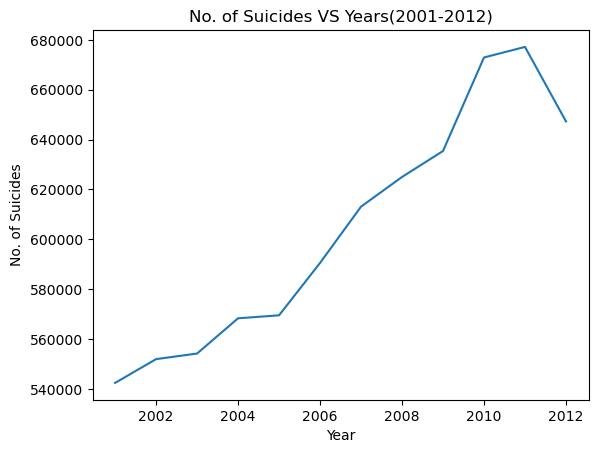

In [16]:
# plotting the graph for observing variation of no. of suicides over the years
ax = df.groupby('Year')['Total'].sum().plot(title = 'No. of Suicides VS Years(2001-2012)')
ax.set_xlabel('Year')
ax.set_ylabel('No. of Suicides')
plt.show()

* There has been a rapid increase in the number of suicides over the years, which is quite concerning.

## 4.2 Suicides among Males and Females (2001-2012)

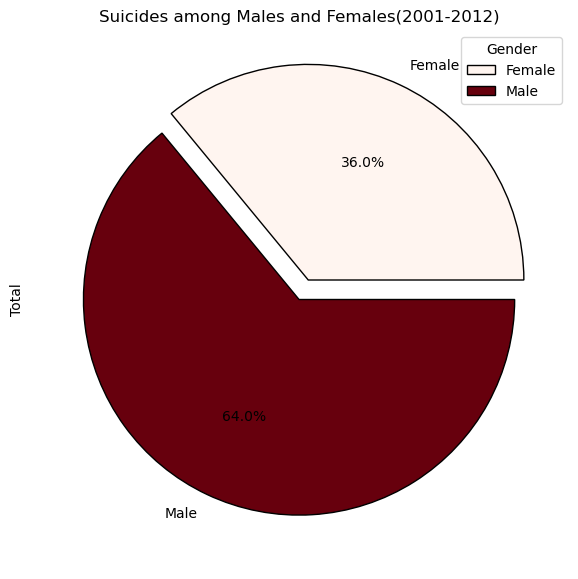

In [17]:
# plotting a pie chart for suicides among Males and Females (2001-2012)
ax = df.groupby('Gender')['Total'] \
.sum().plot.pie(y = 'Total',
                figsize=(7,7),
                autopct='%1.1f%%',
                cmap = 'Reds',
                title='Suicides among Males and Females(2001-2012)',
                explode = (0.1,0),
                wedgeprops= {"edgecolor":"black",
                             'linewidth': 1,
                             'antialiased': True})
plt.legend(title='Gender')
plt.show()

### 4.2.1 Variation of No. of suicides among Males and Females over the years

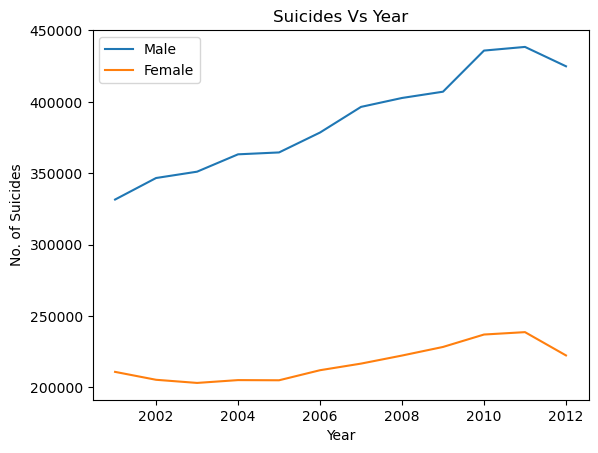

In [18]:
# creating a dataframe for males
male = df.query('Gender == "Male"')

# creating a dataframe for females
female = df.query('Gender == "Female"')

# plottng a graph for observing the variation with year
ax = male.groupby('Year')['Total'].sum().plot(title = 'Suicides Vs Year', label = 'Male')
ax = female.groupby('Year')['Total'].sum().plot(label = 'Female')
plt.xlabel('Year')
plt.ylabel('No. of Suicides')
plt.legend()
plt.show()

* The increase in the number of suicides among males is greater than among females.

## 4.3 Which age group is commiting most suicides?

In [19]:
df.Age_group.value_counts()

Age_group
15-29     24960
30-44     24064
45-59     19730
60+       13766
0-14       9639
0-100+     8951
Name: count, dtype: int64

The age group 0-100+ is not useful for analysis; let's remove it for better analysis.

In [20]:
# creating a new dataset which do not contain rows with age group 0-100+
age_group = df.query('Age_group != "0-100+"').copy()

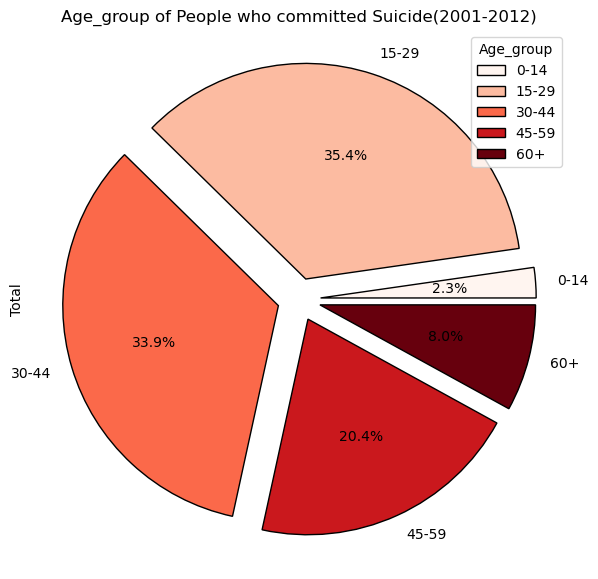

In [21]:
# plotting a pie chart for better visualization and understanding of the data.
ax = age_group.groupby('Age_group')['Total'].sum().plot.pie(y = 'Total',
                figsize=(7,7),
                autopct='%1.1f%%',
                cmap = 'Reds',
                title='Age_group of People who committed Suicide(2001-2012)',
                explode = (0.1,0.1,0.1,0.1,0.1),
                wedgeprops= {"edgecolor":"black",
                             'linewidth': 1,
                             'antialiased': True})
ax.legend(title='Age_group')
plt.show()

General conclusions:<br>
The age group with the highest suicide rate between 2001 and 2012 was 15-29, followed by 30-44 and 45-59.<br>
Suicide rates show a significant decline across all age groups from 2001 to 2012.<br>
The data suggests a need for further investigation into the factors contributing to suicide within the 15-29 age group.<br>

# 5. Causes of Suicide

So far, we have observed the pattern of variation in the number of suicides. Now, we'll figure out the reasons that led to their deaths.
* Knowing the reasons is crucial if we truly want to decrease the number of suicides.

In [22]:
#Making a new dataset named "causes" which only contains causes of the Suicide
causes = df.query('Type_code=="Causes"').copy().reset_index(drop = True)

# Since Type_code only contains causes so let's just remove it
causes = causes.drop(columns=['Type_code'], axis=1)
causes.head()

State  Year                           Type  Gender Age_group  Total
0  A & N Islands  2001                   Love Affairs  Female      0-14      1
1  A & N Islands  2001  Other Causes (Please Specity)  Female      0-14      1
2  A & N Islands  2001        Other Prolonged Illness    Male      0-14      1
3  A & N Islands  2001         Failure in Examination    Male      0-14      1
4  A & N Islands  2001        Other Prolonged Illness  Female     15-29      8

In [23]:
causes.Type.value_counts()

Type
Causes Not known                                  3332
Other Causes (Please Specity)                     3065
Family Problems                                   3013
Other Prolonged Illness                           2680
Insanity/Mental Illness                           2572
Love Affairs                                      1697
Poverty                                           1568
Death of Dear Person                              1511
Fall in Social Reputation                         1496
Suspected/Illicit Relation                        1420
Drug Abuse/Addiction                              1406
Unemployment                                      1404
Property Dispute                                  1393
Failure in Examination                            1379
Bankruptcy or Sudden change in Economic           1373
Cancer                                            1233
Professional/Career Problem                       1160
Cancellation/Non-Settlement of Marriage           1116
Paral

General Observations:

The most prevalent causes of suicide are diverse, with "Causes Not Known" being the most frequent, followed by "Other Causes (Please Specify)," and "Family Problems."<br>
Mental health issues, including "Insanity/Mental Illness" and "Other Prolonged Illness," are significant contributors to suicide.<br>
Relationship problems, such as "Love Affairs," "Death of a Dear Person," and "Divorce," also emerge as substantial factors.<br>
Economic hardships, including "Poverty," "Unemployment," and "Bankruptcy," are associated with increased suicide risk.

In [24]:
#removing rows with unspecified causes
#also removing some discrepancies 
causes = causes.query('Type != ("Other Causes (Please Specity)","Causes Not known","Other Prolonged Illness","Not having Children (Barrenness/Impotency")')

In [25]:
print("Total no. of suicides caused due:\n",causes.groupby('Type')['Total'].sum())

Total no. of suicides caused due:
 Type
Bankruptcy or Sudden change in Economic            32755
Bankruptcy or Sudden change in Economic Status      2655
Cancellation/Non-Settlement of Marriage            11296
Cancer                                              9058
Death of Dear Person                               10321
Divorce                                             4133
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Failure in Examination                             27005
Fall in Social Reputation                          13464
Family Problems                                   341952
Ideological Causes/Hero Worshipping                 2118
Illegitimate Pregnancy                              2494
Illness (Aids/STD)                                  8723
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Not having Children(Barrenness/Impotency        

## 5.1 What are the major reasons for suicide?

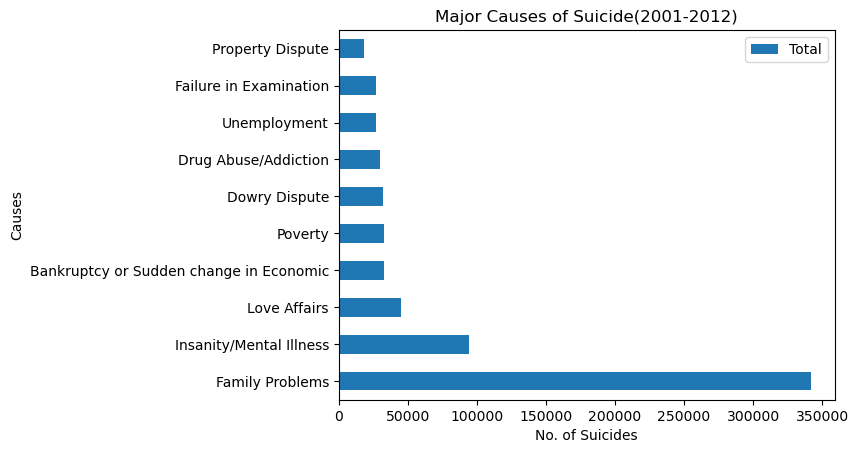

In [26]:
#plotting a bar graph for top 10 causes for suicide for better analysis
causes.groupby('Type')['Total'].sum().to_frame().sort_values('Total',ascending=False).head(10).plot(kind='barh',
                                                                                                    title='Major Causes of Suicide(2001-2012)')
plt.xlabel('No. of Suicides')
plt.ylabel('Causes')
plt.show()

Key Observations:<br><br>
**Family Problems** is the leading cause of suicide, highlighting the significance of familial relationships and support systems.<br>
**Mental health issues**, including Insanity/Mental Illness, are a major contributor, emphasizing the need for accessible mental health services.<br>
**Economic factors** like Bankruptcy, Poverty, and Unemployment are prominent causes, suggesting a correlation between financial hardship and suicide risk.<br>
**Love Affairs, Family Problems, and Death of a Dear Person** indicate the impact of interpersonal relationships on suicidal behavior.<br>

## 5.2 Which states have maximum suicide?

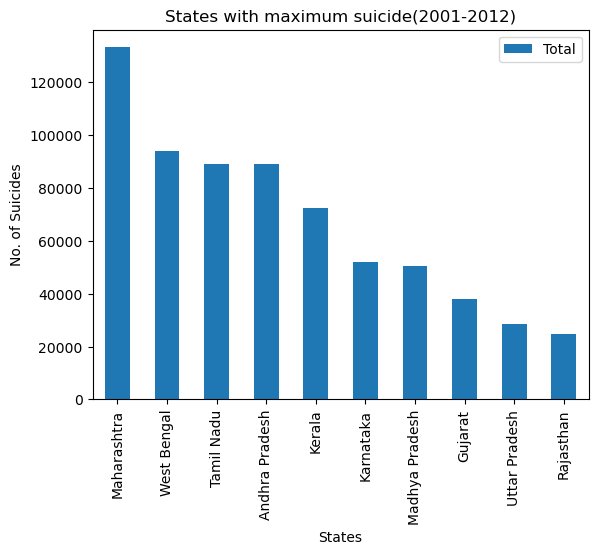

In [27]:
# plotting a bar graph for showing states with maximum no. of suicides
causes.groupby("State")["Total"].sum().to_frame().sort_values('Total',ascending=False).head(10).plot(kind='bar',
                                                                                                     title='States with maximum suicide(2001-2012)')
plt.ylabel('No. of Suicides')
plt.xlabel('States')
plt.show()

Key Observations:<br><br>
**Maharashtra** has the highest number of suicides, significantly surpassing other states.<br>
**West Bengal, Tamil Nadu,** and **Andhra Pradesh** also report a considerably high number of suicides.<br>
**Rajasthan** has the lowest number of suicides among the top 10 states.<br>

# 6. Professional Profiles

In [28]:
# creating a dataset that contains only prfessional profile of people who attempt suicide
professional_profile = df.query('Type_code == "Professional_Profile"').copy().reset_index(drop=True)

#since all rows have professional profile in type_code(that's why we do in last step) so, let's just remove that column
professional_profile = professional_profile.drop(columns=['Type_code'],axis=1)
professional_profile.head()

State  Year                     Type  Gender Age_group  Total
0  A & N Islands  2001                  Student  Female      0-14      2
1  A & N Islands  2001                  Student    Male      0-14      1
2  A & N Islands  2001  Others (Please Specify)    Male      0-14      1
3  A & N Islands  2001               House Wife  Female     15-29     21
4  A & N Islands  2001  Others (Please Specify)  Female     15-29      1

In [29]:
professional_profile.Type.value_counts()

Type
Others (Please Specify)              5509
Unemployed                           2424
Farming/Agriculture Activity         2310
Service (Private)                    2230
Student                              1854
Self-employed (Business activity)    1793
Service (Government)                 1771
House Wife                           1543
Professional Activity                1513
Public Sector Undertaking            1506
Retired Person                        838
Name: count, dtype: int64

## 6.1 People of which profession commit most suicides?

In [30]:
#removing others (please specify)
professional_profile = professional_profile.query('Type != "Others (Please Specify)"')

In [31]:
# replacing "Self-employed (Business activity)" with "Self-employed" for ease of reading
professional_profile = professional_profile.replace({'Self-employed (Business activity)':'Self-employed'})

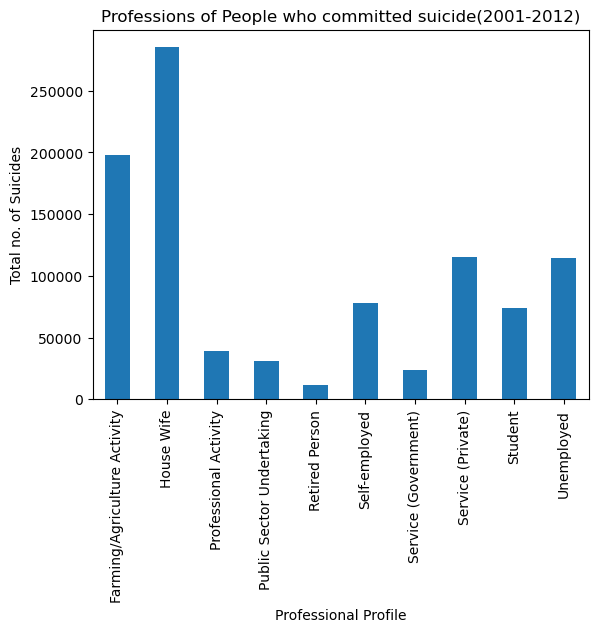

In [32]:
# plotting professional profiles of people who commit suicide
professional_profile.groupby('Type')['Total'].sum().plot(kind = 'bar',
                                                         title='Professions of People who committed suicide(2001-2012)')
plt.xlabel('Professional Profile')
plt.ylabel('Total no. of Suicides')
plt.show()

Key Observations:<br><br>
**Housewives constitute** Activity has the highest number of suicides, indicating a significant correlation between this profession and suicidal tendencies.<br>
**Farming/Agriculture** the second-largest group of suicide victims, highlighting a critical issue within this demographic.<br>
**Professional Activity, Public Sector Undertaking, and Service (Private)** also contribute substantially to the overall suicide count.<br><br>

In [33]:
# creating a dataframe which consist only data of housewives
housewife = professional_profile.query('Type == "House Wife"').copy()
housewife.head()

State  Year        Type  Gender Age_group  Total
3   A & N Islands  2001  House Wife  Female     15-29     21
11  A & N Islands  2001  House Wife  Female     30-44      9
16  A & N Islands  2001  House Wife  Female     45-59      5
21  A & N Islands  2001  House Wife  Female       60+      3
29  A & N Islands  2002  House Wife  Female     15-29     22

In [34]:
# describing the data 
housewife.describe(include = 'object').T

count unique         top  freq
State      1543     35   Rajasthan    60
Type       1543      1  House Wife  1543
Gender     1543      1      Female  1543
Age_group  1543      5       15-29   388

### 6.1.2 What age group of housewives commits the highest number of suicides?

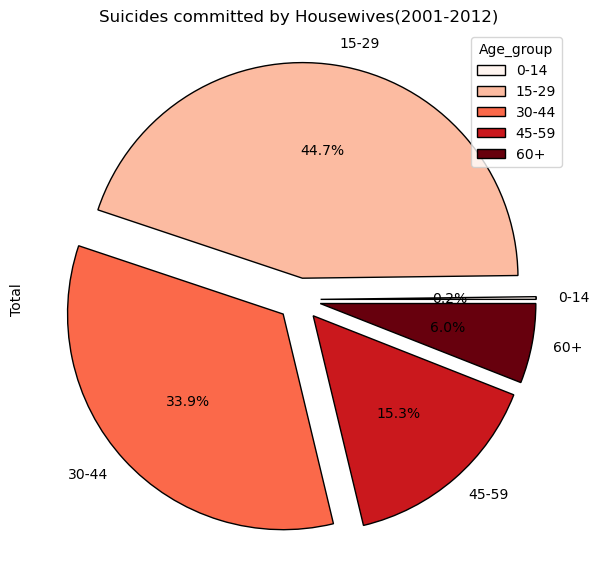

In [35]:
# plotting a pie chart for better understanding 
housewife.groupby('Age_group')['Total'].sum().plot.pie(y= 'Total',
                                                       figsize = (7,7),
                                                       autopct='%1.1f%%',
                                                       title = "Suicides committed by Housewives(2001-2012)",
                                                      cmap = 'Reds',
                                                      explode = (0.1,0.1,0.1,0.1,0.1),
                                                      wedgeprops= {"edgecolor":"black",
                                                                   'linewidth': 1,
                                                                   'antialiased': True})
plt.legend(title='Age_group')
plt.show()


Key Findings:<br><br>
The age group with the **highest** percentage of suicides among housewives is **15-29 years**, accounting for **44.7%** of cases.<br>
The **second-highest** percentage of suicides occurs in the **30-44** years age group, representing **33.9%** of cases.<br>
A relatively smaller proportion of suicides happens in the **45-59** years age group at **15.3%.**<br>
The remaining age groups, **0-14 and 60+**, have **negligible percentages**.<br><br>
This suggests a potential correlation between age, domestic responsibilities, and mental health challenges among housewives.

## 6.2 Suicides among students

In [36]:
# creating a new dataset which contains information of students only
student = professional_profile.query('Type == "Student"').copy()
student.head()

State  Year     Type  Gender Age_group  Total
0   A & N Islands  2001  Student  Female      0-14      2
1   A & N Islands  2001  Student    Male      0-14      1
5   A & N Islands  2001  Student  Female     15-29      9
10  A & N Islands  2001  Student    Male     15-29      2
26  A & N Islands  2002  Student  Female      0-14      2

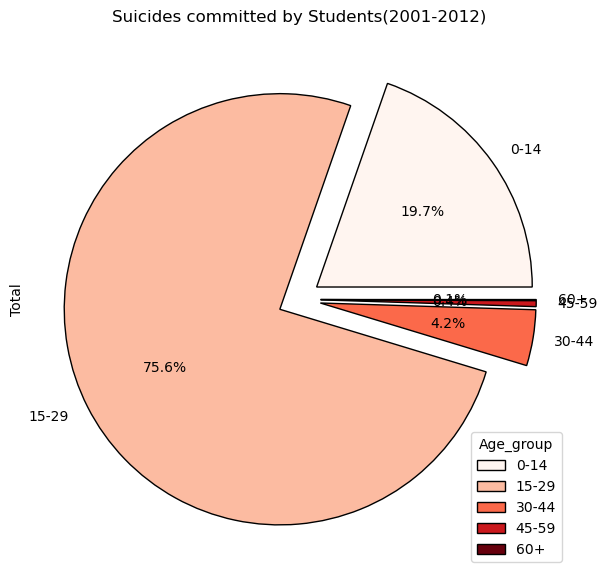

In [37]:
student.groupby('Age_group')['Total'].sum().plot.pie(y='Total',
                                                     figsize=(7,7),
                                                     autopct='%1.1f%%',
                                                     title='Suicides committed by Students(2001-2012)',
                                                     cmap = 'Reds',
                                                     explode = (0.1,0.1,0.1,0.1,0.1),
                                                     wedgeprops= {"edgecolor":"black",
                                                                  'linewidth': 1,
                                                                  'antialiased': True})
plt.legend(title='Age_group')
plt.show()

Key Observations:

* The age group with the highest percentage of suicides is 15-29, accounting for 76% of cases.
* The second-highest percentage of suicides occurs in the 0-14 age group, representing 19.7% of cases.
* The remaining age groups, 30-44, 45-59, and 60+, have negligible percentages.

### 6.2.1 Increasing no. of suicides among Students over the years

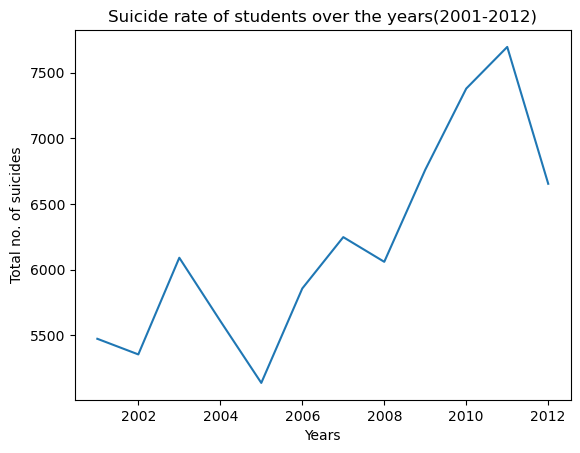

In [38]:
# plotting a line graph No. of suicides vs year
student.groupby('Year')['Total'].sum().plot(title='Suicide rate of students over the years(2001-2012)')
plt.xlabel('Years')
plt.ylabel('Total no. of suicides')
plt.show()

# 7. Social Status

In [39]:
df.Type_code.value_counts()

Type_code
Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: count, dtype: int64

In [40]:
# creating a dataframe consisting only social status of the people who committed suicides
social_status = df.query('Type_code=="Social_Status"').copy().reset_index(drop=True)

# since Type_code has only 1 value so it's better to delete it
social_status = social_status.drop(columns=['Type_code'],axis=1)
social_status.head()

State  Year           Type  Gender Age_group  Total
0  A & N Islands  2001        Married  Female    0-100+     38
1  A & N Islands  2001  Never Married  Female    0-100+     12
2  A & N Islands  2001        Married    Male    0-100+     55
3  A & N Islands  2001  Never Married    Male    0-100+     24
4  A & N Islands  2002  Never Married  Female    0-100+     17

In [41]:
social_status.Age_group.value_counts()

Age_group
0-100+    3349
Name: count, dtype: int64

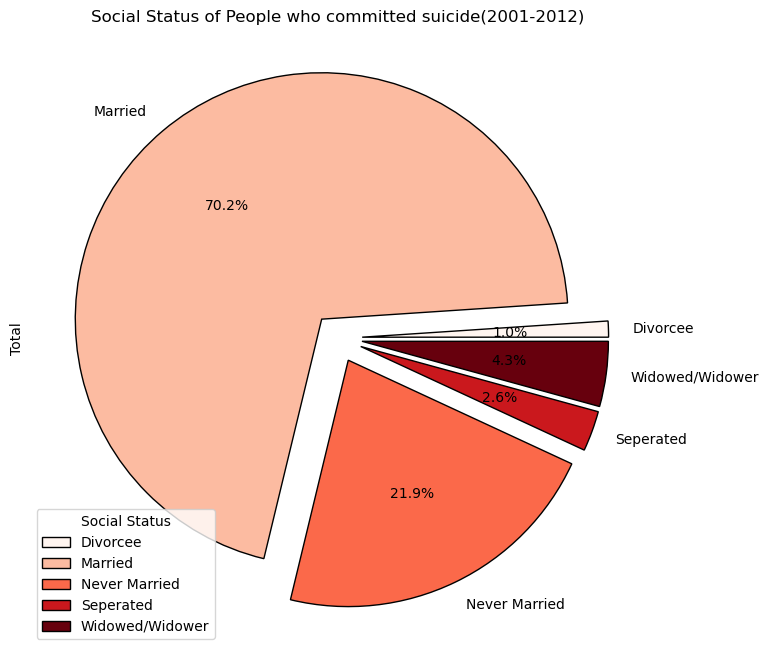

In [42]:
# plotting a pie chart of the social status of the people who committed suicide
social_status.groupby('Type')['Total'].sum().plot.pie(y='Total',
                                                      figsize=(8,8),
                                                      autopct='%1.1f%%',
                                                      title='Social Status of People who committed suicide(2001-2012)',
                                                      cmap = 'Reds',
                                                      explode = (0.1,0.1,0.1,0.1,0.1),
                                                      wedgeprops= {"edgecolor":"black",
                                                                   'linewidth': 1,
                                                                   'antialiased': True})
plt.legend(title='Social Status')
plt.show()

Key Findings:
* Marital status significantly influences suicide rates. Married individuals constitute the largest proportion of suicide victims at 70.2%.
* Those who have never married account for a substantial portion of suicides at 21.9%.
* Widowed, divorced, and separated individuals collectively represent a smaller percentage of suicide cases.

# 8. Means Adopted for Suicide

It is also crucial to identify the methods people are using to commit suicide in order to find solutions.

In [43]:
df.Type_code.value_counts()

Type_code
Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Education_Status         5602
Social_Status            3349
Name: count, dtype: int64

In [44]:
# creating a dataframe which contains only means adopted by people to commit suicide
means_adopted = df.query('Type_code=="Means_adopted"').copy().reset_index(drop=True)

#dropping Type_code column
means_adopted = means_adopted.drop(columns=['Type_code'],axis=1)
means_adopted.head()

State  Year                       Type  Gender Age_group  Total
0  A & N Islands  2001                 By Hanging  Female      0-14      2
1  A & N Islands  2001                 By Hanging    Male      0-14      2
2  A & N Islands  2001    By Fire/Self Immolation  Female     15-29      2
3  A & N Islands  2001  By Consuming Other Poison  Female     15-29      9
4  A & N Islands  2001                 By Hanging  Female     15-29     20

In [45]:
means_adopted.Type.value_counts()

Type
By Hanging                                 3514
By Consuming Other Poison                  2952
By Drowning                                2609
By Consuming Insecticides                  2608
By Fire/Self Immolation                    2582
By Other means (please specify)            2415
By coming under running vehicles/trains    1782
By touching electric wires                 1483
By Jumping from (Other sites)              1384
By Jumping from (Building)                 1325
By Overdose of sleeping pills              1272
By Fire-Arms                               1236
By Over Alcoholism                         1228
By Jumping off Moving Vehicles/Trains      1137
By Self Infliction of injury               1093
By Machine                                  504
By Other means                              213
Name: count, dtype: int64

In [46]:
# there are two unique values that mean the same, so let's combine them
means_adopted = means_adopted.replace(['By Other means (please specify)'],['By Other means'])
means_adopted.Type.value_counts()

Type
By Hanging                                 3514
By Consuming Other Poison                  2952
By Other means                             2628
By Drowning                                2609
By Consuming Insecticides                  2608
By Fire/Self Immolation                    2582
By coming under running vehicles/trains    1782
By touching electric wires                 1483
By Jumping from (Other sites)              1384
By Jumping from (Building)                 1325
By Overdose of sleeping pills              1272
By Fire-Arms                               1236
By Over Alcoholism                         1228
By Jumping off Moving Vehicles/Trains      1137
By Self Infliction of injury               1093
By Machine                                  504
Name: count, dtype: int64

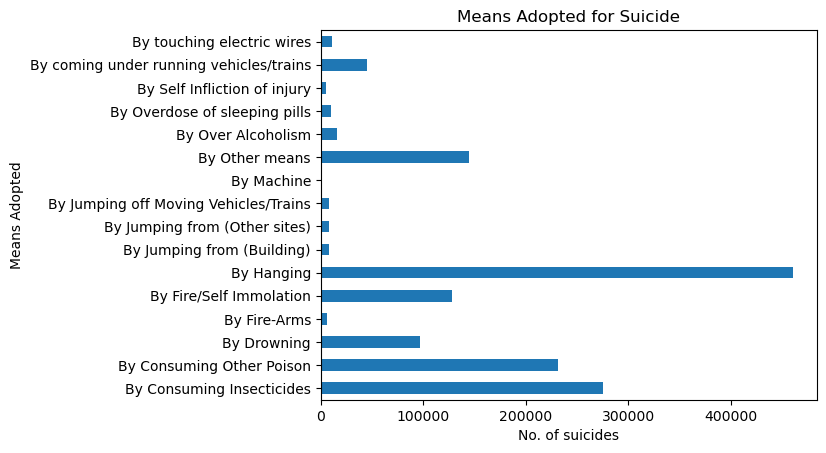

In [47]:
# plotting a bar graph for better understanding
means_adopted.groupby('Type')['Total'].sum().plot(kind='barh',title='Means Adopted for Suicide')
plt.xlabel('No. of suicides')
plt.ylabel('Means Adopted')
plt.show()

Key Findings:<br>
* **Hanging** is the most prevalent method of suicide, accounting for a significantly higher number of cases compared to other methods.
* **Consuming insecticides and other poisons** are also common methods employed.
* Methods involving physical harm, such as **jumping from heights, coming under running vehicles, and self-inflicted injuries, contribute to a substantial number of suicides**.
* Other methods, **including firearms, fire/self-immolation, and drowning, while less frequent**, still account for a considerable number of cases.

# 9. Implement machine learning model

In [48]:
# Data preprocessing
df = df.query('State != ("Total (All India)","Total (States)", "Total (Uts)")')
df = df.query('Total != 0')
# Bin the 'Total' values into categories
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['Total_binned'] = pd.cut(df['Total'], bins=bins, labels=labels)

### 9.1 Label encoding on the dataset

In [49]:
# Encode categorical variables
label_encoders = {}
for column in ['State', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total_binned']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [50]:
# Create new features
df['State_Type'] = df['State'].astype(str) + '_' + df['Type'].astype(str)
df['Gender_Age'] = df['Gender'].astype(str) + '_' + df['Age_group'].astype(str)

# Encode the new features
df['State_Type'] = label_encoders['State'].fit_transform(df['State_Type'])
df['Gender_Age'] = label_encoders['Gender'].fit_transform(df['Gender_Age'])

In [72]:
df

State  Year  Type_code  Type  Gender  Age_group  Total  Total_binned  \
13          0  2001          0    39       0          1      1             0   
20          0  2001          0    47       0          1      1             0   
32          0  2001          0    48       1          1      1             0   
47          0  2001          0    28       1          1      1             0   
54          0  2001          0    48       0          2      8             0   
...       ...   ...        ...   ...     ...        ...    ...           ...   
237514     34  2012          4    61       1          0    149             2   
237515     34  2012          4    68       1          0    233             2   
237516     34  2012          4    40       1          0   5451             6   
237517     34  2012          4    25       1          0    189             2   
237518     34  2012          4    43       1          0   2658             3   

        State_Type  Gender_Age  
13              21           1  
20              29           1  
32              30           7  
47              12           7  
54              30           2  
...            ...         ...  
237514        1750           6  
237515        1757           6  
237516        1727           6  
237517        1710           6  
237518        1730           6  

[101110 rows x 10 columns]

### 9.2 Set features and targets

In [51]:
# Features and target
features = df.drop(columns=['Total', 'Total_binned'])
target = df['Total_binned']

In [52]:
df['Total_binned']

13        0
20        0
32        0
47        0
54        0
         ..
237514    2
237515    2
237516    6
237517    2
237518    3
Name: Total_binned, Length: 101110, dtype: int32

In [53]:
# Scale numerical features
scaler = StandardScaler()
features[['Year']] = scaler.fit_transform(features[['Year']])

### 9.3 Splitting Data

In [54]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [55]:
# Define the parameter grid for GBM
param_grid_gbm = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200],
    'max_leaf_nodes': [31, 63],
    'max_depth': [3, 5, 7]
}

### 9.4 Model Training

In [56]:
# Grid search for GBM
grid_gbm = GridSearchCV(HistGradientBoostingClassifier(), param_grid_gbm, cv=5, n_jobs=-1, verbose=1)
grid_gbm.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'max_iter': [100, 200],
                         'max_leaf_nodes': [31, 63]},
             verbose=1)

In [57]:
# Best parameters and score for GBM
best_gbm = grid_gbm.best_estimator_
print("Best parameters for GBM:", grid_gbm.best_params_)
print("Best cross-validation score for GBM:", grid_gbm.best_score_)

Best parameters for GBM: {'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 200, 'max_leaf_nodes': 31}
Best cross-validation score for GBM: 0.6676332243361027


In [58]:
# Train the GBM model
gbm = HistGradientBoostingClassifier()
gbm.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [59]:
# Train the best GBM model
best_gbm.fit(X_train, y_train)

HistGradientBoostingClassifier(max_depth=7, max_iter=200)

In [60]:
# Evaluate the best GBM model
y_pred_gbm = best_gbm.predict(X_test)
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print(f"Best GBM Accuracy: {accuracy_gbm:.2f}")

Best GBM Accuracy: 0.65


The accuracy of the model is 68 % let's train it further

In [61]:
print("Best GBM Classification Report:")
print(classification_report(y_test, y_pred_gbm))

Best GBM Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.98      0.79     16344
           1       0.46      0.17      0.25      7425
           2       0.67      0.58      0.62      3356
           3       0.69      0.71      0.70       297
           4       0.50      0.04      0.08      2337
           5       0.63      0.40      0.49       557
           6       0.29      0.41      0.34        17

    accuracy                           0.65     30333
   macro avg       0.56      0.47      0.47     30333
weighted avg       0.61      0.65      0.58     30333



In [62]:
print("Best GBM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gbm))

Best GBM Confusion Matrix:
[[15982   284    54     9     6     3     6]
 [ 5927  1238   179    13    56     3     9]
 [  801   500  1932    19    35    69     0]
 [    0     0    32   211     0    53     1]
 [ 1201   637   396     2    97     3     1]
 [    7    10   273    44     0   223     0]
 [    0     0     0    10     0     0     7]]


In [63]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

### 9.5 Model Training with XGBoost 

In [64]:
# Grid search for XGBoost
grid_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             verbose=1)

In [65]:
# Best parameters and score for XGBoost
best_xgb = grid_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best cross-validation score for XGBoost:", grid_xgb.best_score_)

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score for XGBoost: 0.812622748644588


In [66]:
# Train the best XGBoost model
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [67]:
# Evaluate the best XGBoost model
y_pred_xgb = best_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Best XGBoost Accuracy: {accuracy_xgb:.2f}")

Best XGBoost Accuracy: 0.82


In [68]:
print("Best XGBoost Classification Report:")
classification_report(y_test, y_pred_xgb)

Best XGBoost Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.88      0.93      0.91     16344\n           1       0.71      0.68      0.70      7425\n           2       0.82      0.87      0.84      3356\n           3       0.93      0.91      0.92       297\n           4       0.62      0.41      0.50      2337\n           5       0.78      0.74      0.76       557\n           6       1.00      0.94      0.97        17\n\n    accuracy                           0.82     30333\n   macro avg       0.82      0.78      0.80     30333\nweighted avg       0.81      0.82      0.81     30333\n'

In [69]:
print("Best XGBoost Classification Report:")
classification_report(y_test, y_pred_xgb)

Best XGBoost Classification Report:


'              precision    recall  f1-score   support\n\n           0       0.88      0.93      0.91     16344\n           1       0.71      0.68      0.70      7425\n           2       0.82      0.87      0.84      3356\n           3       0.93      0.91      0.92       297\n           4       0.62      0.41      0.50      2337\n           5       0.78      0.74      0.76       557\n           6       1.00      0.94      0.97        17\n\n    accuracy                           0.82     30333\n   macro avg       0.82      0.78      0.80     30333\nweighted avg       0.81      0.82      0.81     30333\n'

### Lastly Generate a pandas profiling for even better visualization

In [70]:
from pandas_profiling import ProfileReport

# Generate the report
profile = ProfileReport(df, title="Suicides in India Dataset Profiling Report")
profile.to_file("suicides_in_india_profile_report.html")

# Display the report
profile.to_notebook_iframe()

C:\Users\HP\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\HP\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit
C:\Users\HP\AppData\Local\Temp\ipykernel_53464\1163172625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profil

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [71]:
# Save the report as an HTML file
profile.to_file("suicides_in_india_profile_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
import joblib
# Save the model
joblib.dump(grid_xgb, 'suicide_prediction_model.pkl')

['suicide_prediction_model.pkl']